# Demand data for France

This is interesting because France has a winter peaking electricity system

In [1]:
import pandas as pd
import numpy as np

import time
from datetime import datetime, timedelta
import pytz

In [2]:
df = pd.read_csv('consommation-quotidienne-brute-elec_FR2.csv')

In [3]:
years = []
for idx in df.index:
    yr = df.loc[idx, 'Date - Heure'][:4]
    years.append(int(yr))
df['year'] = years
print(df['year'].unique())

[2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]


In [4]:
for year in df['year'].unique():
    df1 = df.loc[ df['year'] == year ]
    print(year, len(df1.index)/2)

2007 6.0
2008 8784.0
2009 8760.0
2010 8760.0
2011 8760.0
2012 8784.0
2013 8760.0
2014 8760.0
2015 8760.0
2016 8784.0
2017 8760.0
2018 8754.0


# Data per year
We expect 8760 * 2 entries for non-leap years and 8784 * 2 entries for leap years. There are the correct number of entries each year. Because of this and the confusing datetime/daylight savings/non-daylight savings time issues with the provided datetime column, we will make our own datetime column and simply preserve the sorted ordering of entries after downloading. As long as we start on the correct hour, we should be okay.

In [5]:
def add_datetime_col(df):
    
    # This is hardcoded as we only do it once...
    # Values appear to be reported at the beginning of the time interval.
    first_dt = datetime(year=2008, month=1, day=1, hour=0) - timedelta(hours=1)
    print(f"Starting datetime: {first_dt}")
    
    dts = []
    for i, idx in enumerate(df.index):
        dts.append(first_dt)
        first_dt += timedelta(minutes=30)
    df['date_time'] = dts
    return df

df = add_datetime_col(df)

Starting datetime: 2007-12-31 23:00:00


In [6]:
def make_date_time_col(df):
    
    print(f"Start time {df.iloc[0]['date_time']}")
    
    date_times = []
    vals = []
    for idx in df.index:
        if df.loc[idx, 'date_time'].minute == 30:
            continue
       
        date_times.append(df.loc[idx, 'date_time']) # Report at end of hour like all others
        # avg of each 30 min slice
        vals.append( (df.loc[idx, 'Consommation (MW)'] + df.loc[idx+1, 'Consommation (MW)']) / 2. )
    print(date_times)
    print(vals)
    print(f"Last appended {date_times[-1]}: {vals[-1]}")
    tmp_df = pd.DataFrame({
        'date_time':date_times,
        #'date_strs':date_strs,
        'demand (MW)':vals
    })#, index=date_times)
    return tmp_df




#print(df.head())
tmp_df = make_date_time_col(df)


tmp_df.to_csv('FR_2007-2018.csv', index=False)
    

Start time 2007-12-31 23:00:00


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
import matplotlib.pyplot as plt

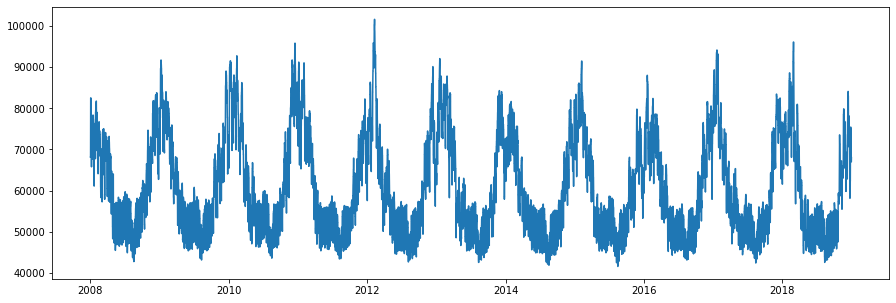

In [8]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(tmp_df['date_time'], tmp_df['demand (MW)'].rolling(24).max())

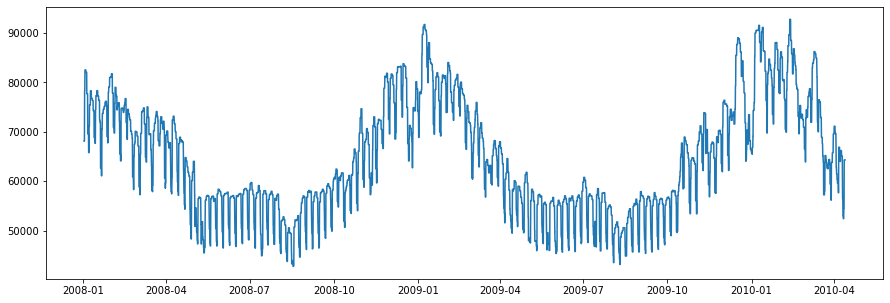

In [9]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(tmp_df.loc[0:20000, 'date_time'], tmp_df.loc[0:20000, 'demand (MW)'].rolling(24).max())